<a href="https://colab.research.google.com/github/danielcdo/-MachineLearning/blob/main/Decision_Tree_Albert_Einstein_SARS_Cov_2_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Packages

In [ ]:
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydotplus

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO

from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Dataset from Albert Einstein Hospital 
## SARS-Cov-2 exames

Get dataset using wget packgage

In [ ]:
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

--2020-07-04 02:48:21--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.06s   

2020-07-04 02:48:22 (4.27 MB/s) - ‘dataset_einstein.csv’ saved [248868/248868]



In [ ]:
# import the dataset into a Pandas Dataframe
df = pd.read_csv('dataset_einstein.csv', delimiter=';')

In [ ]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes. 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  5644 non-null   int64  
 6   Hemoglobin                                             603 non-null    float64
 7   Leukocytes                                             602 non-null    float64
 8   Basophils                                       

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking number of patients registered 
# checking number of columns - features - in the dataset
print('Number of registers:', df.shape[0])
print('Number of columns:',  df.shape[1])

Number of registers: 5644
Number of columns: 11


Please note that there are many features with NaN

A data manipulation - cleanup - will be necessary!!

**Only** patient with all features will be kept. It'll avoid any data noisy and distortion using the **Statistical Learnings Methods**.

In [ ]:
# Droping NaN in place
# If any column contains NaN the entire row will be dropped
df = df.dropna()

In [ ]:
# Please note the the dataset was reduced significantly.
# It may affect the Statistical Learning Method adopted.
#df.info()

print('Number of registers after dropping NaN:', df.shape[0])
print('Number of columns after dropping NaN:',  df.shape[1])

Number of registers after dropping NaN: 357
Number of columns after dropping NaN: 11


# Balanced or Unbalanded Dataset?!

In [ ]:
# Label target - SARS-Cov-2 exam result - can be positive or negative
print ('Negative registers:', df[df['SARS-Cov-2 exam result'] == 'negative'].shape[0])
print ('Positive registers:', df[df['SARS-Cov-2 exam result'] == 'positive'].shape[0])




Negative registers: 302
Positive registers: 55


We can confirm that the numebers of negative cases are much greater than positivd cases. Unbalanded Dataset.

To use the Decision Tree Method a feature and a label dataset will be created.
Both datasets need to be a **Numpy Array**.

Let's select and convert the data to numpy array,


In [ ]:
# Labels
Y = df['SARS-Cov-2 exam result'].values    # it will use a numpy array
print('Labels:', Y)


# feaures to be used in the ML method
X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values
print('Feaures:', X)

Labels: ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative

# Splitting the dataset in **Training** and **Testing**

In [ ]:
X_training, X_testing, Y_training,  Y_testing = train_test_split(X, Y, test_size=0.2, random_state=101)

# Building the **Algorithm** and **Model**

**Algorithm** - Decision Tree - will be used to fit the training dataset, and it'll export a **Model** to be used in the training dataset and to any unseen data!

**Note**: using the **Entropy** criterion. The system starts with the maximum entropy - dataset as a Caos - then, the decision tree method will try at each level, depth, to organize the system, to reduce the entropy. The system will check/look for the previous step and with the **Information Gain** will reduce the entropy. The start feature will be automatically be selected by the Decision Tree method. The feature with maximum Information Gain, meaning minimum Entropy possible, will be chosen.

Depth as 5 is chosen to try to avoid **overfitting**.


In [ ]:
# defining a decision tree object
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [ ]:
# checking the training dataset
print('Training dataset...')
print('Number of samples:', X_training.shape[0])
print('Number of features:', X_training.shape[1])

type(X_training)


Training dataset...
Number of samples: 285
Number of features: 4


numpy.ndarray

# Training - fitting - the Decision Tree

**Model** will be fitted.

In [ ]:
# Train the model using the training sets
tree_clf.fit(X_training, Y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Decision Tree can be consired a *White Box* model. All steps in a Decision Tree can be interpreted, and below will try to show the steps used by the decision tree model.


StringIO to output the data, export_graphviz to show the tree. Need to use the feature names and labels (classes). Pydoplus to show/plot the graph (tree).

Important features: [0.19566516 0.60391072 0.01573131 0.1846928 ]
['negative' 'positive']


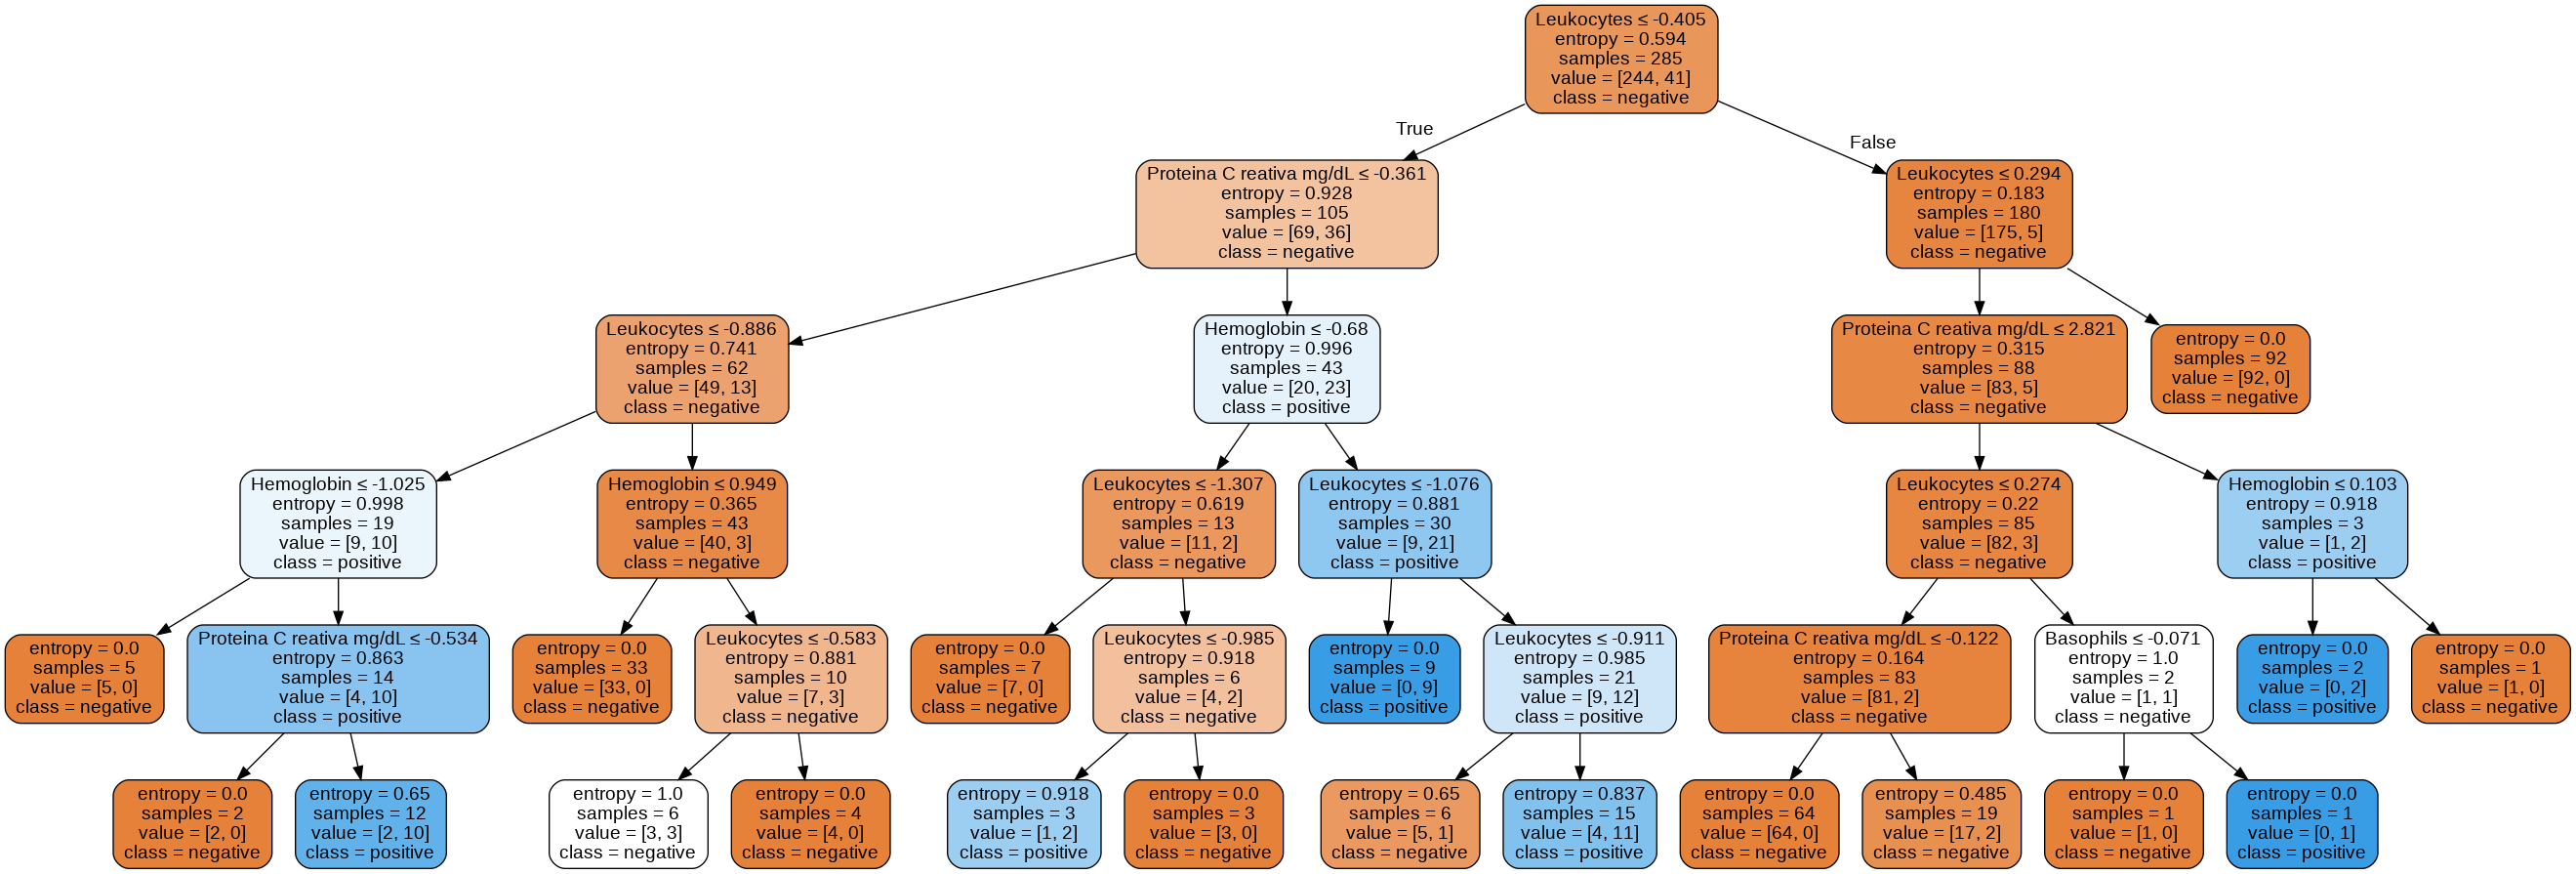

In [ ]:
# more important features used by the Decision Tree 
print('Important features:', tree_clf.feature_importances_)

# getting the features names and labels
feature_names = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
class_names = tree_clf.classes_

print(class_names)

# building the decision tree image
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, feature_names=feature_names, 
                class_names=class_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# to save image
#graph.write_png("decision_tree.png")
#Image('tree.png')



## Investigation the most import feature 
 Feature indices:
- 0 - 'Hemoglobin', 
- 1 - 'Leukocytes'
- 2 - 'Basophils',
- 3 - 'Proteina C reativa mg/dL']

Feature Ranking:
1. feature 1 (0.603911)
2. feature 0 (0.195665)
3. feature 3 (0.184693)
4. feature 2 (0.015731)


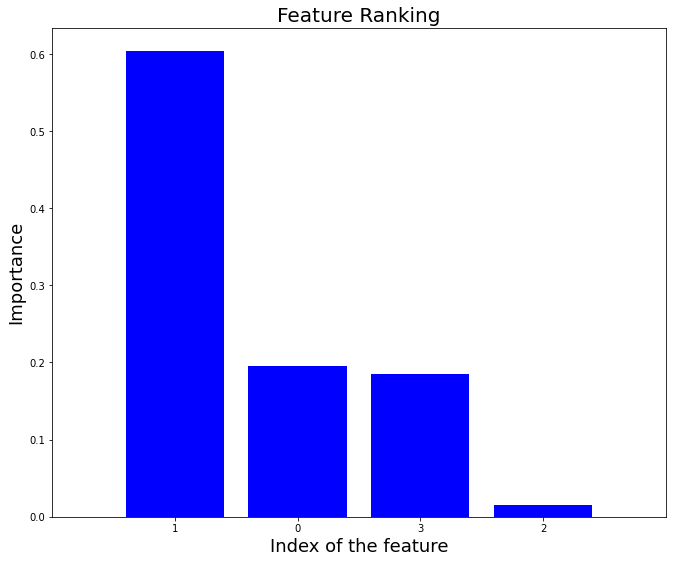

In [ ]:
importance = tree_clf.feature_importances_
indices = np.argsort (importance)[::-1]

print('Feature Ranking:')

for f in range(X.shape[1]):
  print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# plotting
f, ax = plt.subplots(figsize=(11,9))
plt.title("Feature Ranking", fontsize= 20)
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize = 18)
plt.xlabel("Index of the feature", fontsize = 18)
plt.show()

In [ ]:
print(indices)


[1 0 3 2]


# Make predictions using the testing set

In [ ]:
Y_pred = tree_clf.predict(X_testing)

In [ ]:
print(Y_pred)

['negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative']


# Model's metrics

In [ ]:
print("Acuracy:", metrics.accuracy_score(Y_testing, Y_pred))
print()
print("Classification Report:")
print(classification_report(Y_testing, Y_pred))

Acuracy: 0.7083333333333334

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80        58
    positive       0.35      0.57      0.43        14

    accuracy                           0.71        72
   macro avg       0.61      0.66      0.62        72
weighted avg       0.77      0.71      0.73        72

